In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [3]:
student = pd.read_csv("StudentsPerformance.csv")
student


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
student.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
student.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
student.select_dtypes('object').nunique()
print("Categories in 'gender' variable: ",end=" ")
print(student['gender'].unique())
print("Categories in 'race/ethnicity' variable: ",end=" ")
print(student['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable: ",end=" ")
print(student['parental level of education'].unique())
print("Categories in 'lunch' variable: ",end=" ")
print(student['lunch'].unique())
print("Categories in 'test preparation course' variable: ",end=" ")
print(student['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [9]:
student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [58]:
student['Total Score']=student['math score']+student['reading score']+student['writing score']
def result(TS,MS,WS,RS ):
    if(TS>=150 and MS>=50 and WS>=50 and RS>=50):
        return '1'
    else:
        return '0'
        

In [61]:
student['pass']=student.apply(lambda x: result(x['Total Score'],x['math score'],x['writing score'],x['reading score']),axis = 1 )
d=student.drop(['Total Score','Pass/Fail',],axis=1)
d

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [60]:
student['pass'].value_counts()

1    812
0    188
Name: pass, dtype: int64

Text(0.5, 1.0, 'Percentage of students Passed/Failed')

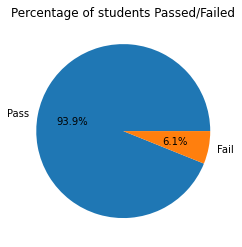

In [13]:
plt.pie(student['Pass/Fail'].value_counts(),labels=['Pass','Fail'],autopct='%1.1f%%')
plt.title('Percentage of students Passed/Failed')

In [14]:
student['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
print("Percentage of female students passed: {0:.2f}%"
    .format((student[(student['gender']=='female') & (student['Pass/Fail']=='P')].shape[0]/student[student['gender']=='female'].shape[0])*100))

#to find out the percentage of male students passed
print("Percentage of male students passed: {0:.2f}%"
    .format((student[(student['gender']=='male') & (student['Pass/Fail']=='P')].shape[0]/student[student['gender']=='male'].shape[0])*100))

Percentage of female students passed: 92.86%
Percentage of male students passed: 95.02%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

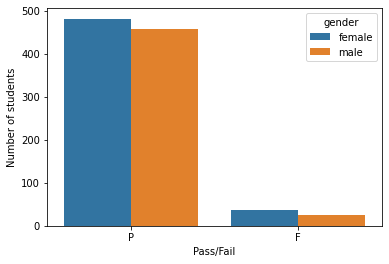

In [16]:
sns.countplot(student['Pass/Fail'],hue = student['gender'])
plt.ylabel('Number of students')

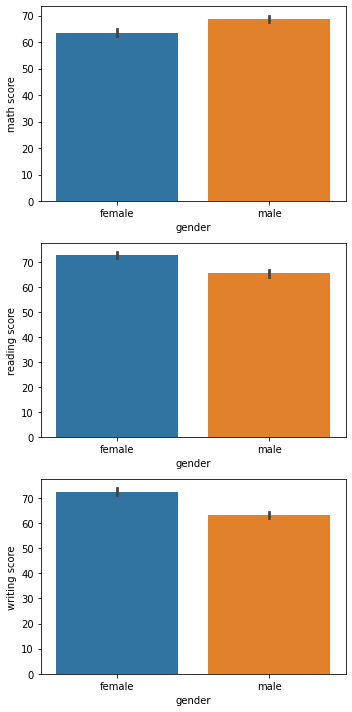

In [17]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.barplot(x=student['gender'],y=student['math score'], ax=ax[0], linewidth=2.5)
sns.barplot(x=student['gender'],y=student['reading score'], ax=ax[1],linewidth=2.5)
sns.barplot(x=student['gender'],y=student['writing score'], ax=ax[2],linewidth=2.5)
plt.tight_layout()

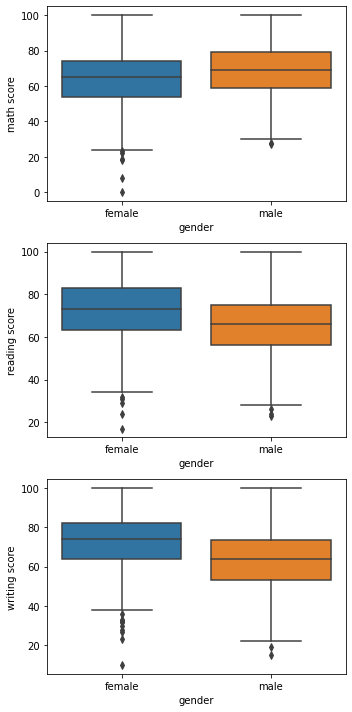

In [18]:
fig,ax = plt.subplots(3,1, figsize = (5,10))
sns.boxplot(x=student['gender'],y=student['math score'],ax=ax[0])
sns.boxplot(x=student['gender'],y=student['reading score'],ax=ax[1])
sns.boxplot(x=student['gender'],y=student['writing score'],ax=ax[2])
plt.tight_layout()

In [19]:
student['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

The number of students passed across various race/ethnic group : 
group C    298
group D    249
group B    176
group E    134
group A     82
Name: race/ethnicity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

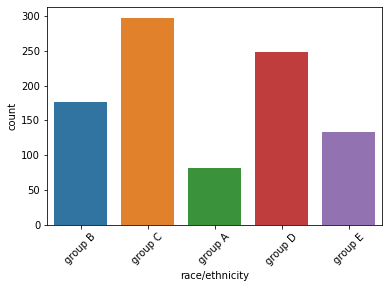

In [20]:
print("The number of students passed across various race/ethnic group : ")
print(student['race/ethnicity'].loc[student['Pass/Fail']=='P'].value_counts())
sns.countplot(student['race/ethnicity'].loc[student['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

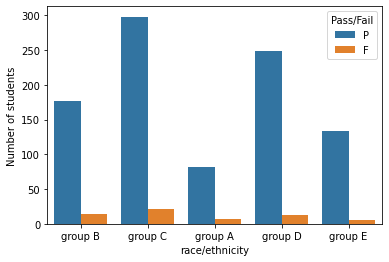

In [21]:
sns.countplot(student['race/ethnicity'],hue=student['Pass/Fail'])
plt.ylabel('Number of students')

In [22]:
print("Percentage of students passed with the race/ethnicity  as 'group A': {0:.2f}%"
    .format((student[(student['race/ethnicity']=='group A') & (student['Pass/Fail']=='P')].shape[0]/student[student['race/ethnicity']=='group A'].shape[0])*100))


print("Percentage of students passed with the race/ethnicity  as 'group B': {0:.2f}%"
    .format((student[(student['race/ethnicity']=='group B') & (student['Pass/Fail']=='P')].shape[0]/student[student['race/ethnicity']=='group B'].shape[0])*100))


print("Percentage of students passed with the race/ethnicity  as 'group C': {0:.2f}%"
    .format((student[(student['race/ethnicity']=='group C') & (student['Pass/Fail']=='P')].shape[0]/student[student['race/ethnicity']=='group C'].shape[0])*100))


print("Percentage of students passed with the race/ethnicity  as 'group D': {0:.2f}%"
    .format((student[(student['race/ethnicity']=='group D') & (student['Pass/Fail']=='P')].shape[0]/student[student['race/ethnicity']=='group D'].shape[0])*100))


print("Percentage of students passed with the race/ethnicity  as 'group E': {0:.2f}%"
    .format((student[(student['race/ethnicity']=='group E') & (student['Pass/Fail']=='P')].shape[0]/student[student['race/ethnicity']=='group E'].shape[0])*100))

Percentage of students passed with the race/ethnicity  as 'group A': 92.13%
Percentage of students passed with the race/ethnicity  as 'group B': 92.63%
Percentage of students passed with the race/ethnicity  as 'group C': 93.42%
Percentage of students passed with the race/ethnicity  as 'group D': 95.04%
Percentage of students passed with the race/ethnicity  as 'group E': 95.71%


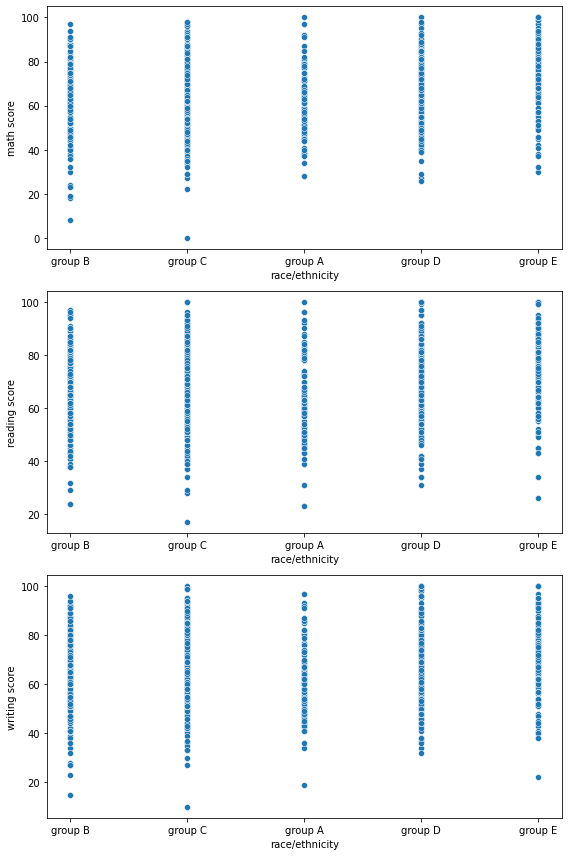

In [23]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.scatterplot(x=student['race/ethnicity'],y=student['math score'],ax=ax[0])
sns.scatterplot(x=student['race/ethnicity'],y=student['reading score'],ax=ax[1])
sns.scatterplot(x=student['race/ethnicity'],y=student['writing score'],ax=ax[2])
plt.tight_layout()

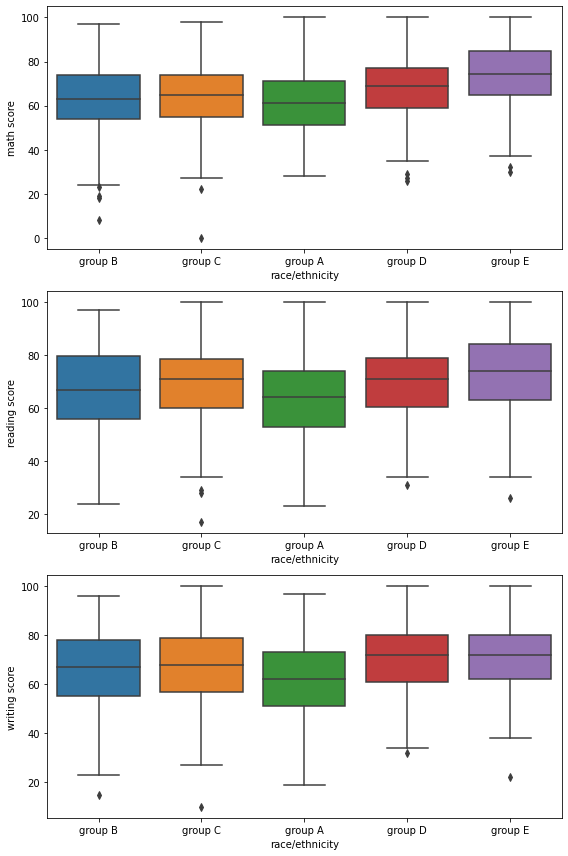

In [24]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.boxplot(x=student['race/ethnicity'],y=student['math score'],ax=ax[0])
sns.boxplot(x=student['race/ethnicity'],y=student['reading score'],ax=ax[1])
sns.boxplot(x=student['race/ethnicity'],y=student['writing score'],ax=ax[2])
plt.tight_layout()

In [25]:
student['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

The number of students passed across the different parental levels of education: 
some college          216
associate's degree    212
high school           178
some high school      162
bachelor's degree     114
master's degree        57
Name: parental level of education, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

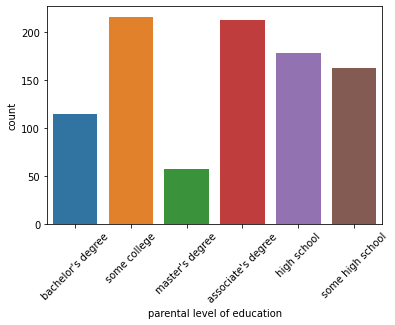

In [26]:
print("The number of students passed across the different parental levels of education: ")
print(student['parental level of education'].loc[student['Pass/Fail']=='P'].value_counts())
sns.countplot(student['parental level of education'].loc[student['Pass/Fail']=='P'])
plt.xticks(rotation = 45)

In [27]:

print("Percentage of students passed with the parental level of education as 'some college': {0:.2f}%"
    .format((student[(student['parental level of education']=='some college') & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=='some college'].shape[0])*100))

print("Percentage of students passed with the parental level of education as 'associate's degree': {0:.2f}%"
    .format((student[(student['parental level of education']=="associate's degree") & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=="associate's degree"].shape[0])*100))


print("Percentage of students passed with the parental level of education as 'high school': {0:.2f}%"
    .format((student[(student['parental level of education']=="high school") & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=="high school"].shape[0])*100))

print("Percentage of students passed with the parental level of education as 'some high school': {0:.2f}%"
    .format((student[(student['parental level of education']=="some high school") & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=="some high school"].shape[0])*100))


print("Percentage of students passed with the parental level of education as 'bachelor's degree': {0:.2f}%"
    .format((student[(student['parental level of education']=="bachelor's degree") & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=="bachelor's degree"].shape[0])*100))

print("Percentage of students passed with the parental level of education as 'master's degree': {0:.2f}%"
    .format((student[(student['parental level of education']=="master's degree") & (student['Pass/Fail']=='P')].shape[0]/student[student['parental level of education']=="master's degree"].shape[0])*100))

Percentage of students passed with the parental level of education as 'some college': 95.58%
Percentage of students passed with the parental level of education as 'associate's degree': 95.50%
Percentage of students passed with the parental level of education as 'high school': 90.82%
Percentage of students passed with the parental level of education as 'some high school': 90.50%
Percentage of students passed with the parental level of education as 'bachelor's degree': 96.61%
Percentage of students passed with the parental level of education as 'master's degree': 96.61%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of students')

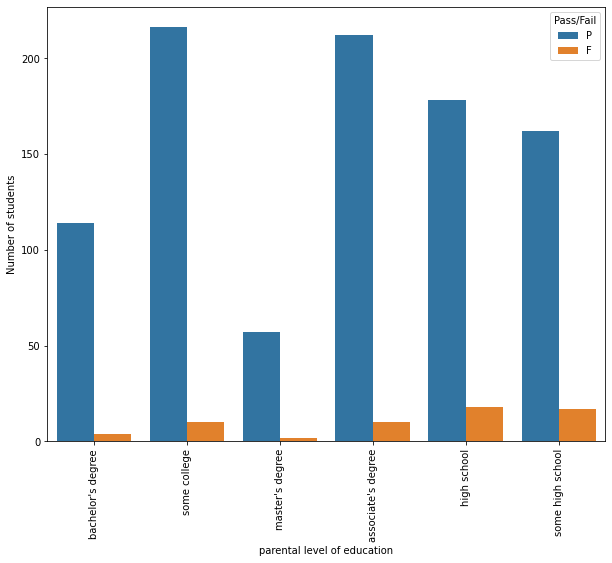

In [28]:
plt.figure(figsize= (10,8))
sns.countplot(student['parental level of education'],hue=student['Pass/Fail'])
plt.xticks(rotation=90)
plt.ylabel('Number of students')

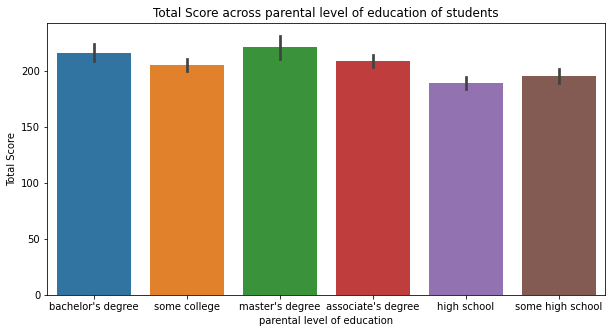

In [29]:
plt.figure(figsize=(10,5))
plt.title("Total Score across parental level of education of students")
sns.barplot(x=student['parental level of education'],y=student['Total Score'])

In [30]:
student['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [31]:
student['lunch'].loc[student['Pass/Fail']=='P'].value_counts()

standard        629
free/reduced    310
Name: lunch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


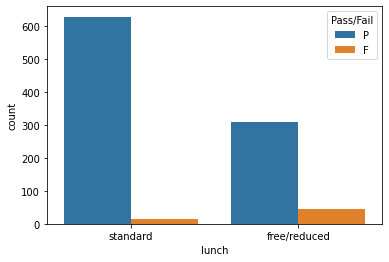

In [32]:
sns.countplot(student['lunch'],hue=student['Pass/Fail'])

In [33]:
#to find out the percentage of students passed with the lunch type as 'standard'
print("Percentage of students passed with the lunch type as 'standard': {0:.2f}%"
    .format((student[(student['lunch']=='standard') & (student['Pass/Fail']=='P')].shape[0]/student[student['lunch']=='standard'].shape[0])*100))

#to find out the percentage of students passed with the lunch type as 'free/reduced'
print("Percentage of students passed with the lunch type as 'free/reduced': {0:.2f}%"
    .format((student[(student['lunch']=="free/reduced") & (student['Pass/Fail']=='P')].shape[0]/student[student['lunch']=="free/reduced"].shape[0])*100))

Percentage of students passed with the lunch type as 'standard': 97.52%
Percentage of students passed with the lunch type as 'free/reduced': 87.32%


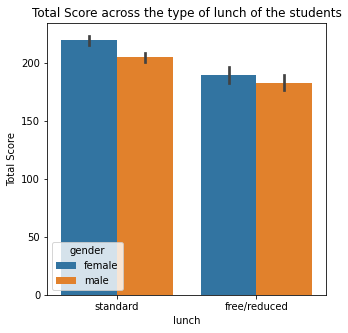

In [34]:
plt.figure(figsize=(5,5))
plt.title("Total Score across the type of lunch of the students")
sns.barplot(x=student['lunch'],y=student['Total Score'],hue=student['gender'])

In [35]:
student['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [36]:
print("The number of students passed across the status of completion of the test preparation course:")
print(student['test preparation course'].loc[student['Pass/Fail']=='P'].value_counts())

The number of students passed across the status of completion of the test preparation course:
none         591
completed    348
Name: test preparation course, dtype: int64


In [37]:
#to find out the percentage of students passed with the test preparation course status as 'none'
print("Percentage of students passed with the test preparation course status as 'none': {0:.2f}%"
    .format((student[(student['test preparation course']=='none') & (student['Pass/Fail']=='P')].shape[0]/student[student['test preparation course']=='none'].shape[0])*100))

#to find out the percentage of students passed with the test preparation course status as 'completed'
print("Percentage of students passed with the test preparation course status as 'completed': {0:.2f}%"
    .format((student[(student['test preparation course']=="completed") & (student['Pass/Fail']=='P')].shape[0]/student[student['test preparation course']=="completed"].shape[0])*100))

Percentage of students passed with the test preparation course status as 'none': 92.06%
Percentage of students passed with the test preparation course status as 'completed': 97.21%


Text(0.5, 0, 'Status of Test Prep Course')

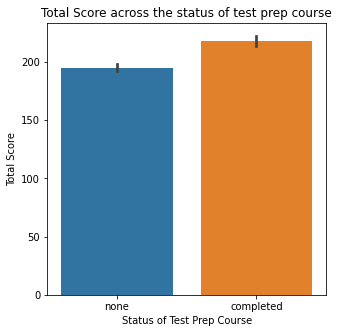

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(x=student['test preparation course'],y=student['Total Score'])
plt.title("Total Score across the status of test prep course")
plt.xlabel('Status of Test Prep Course')

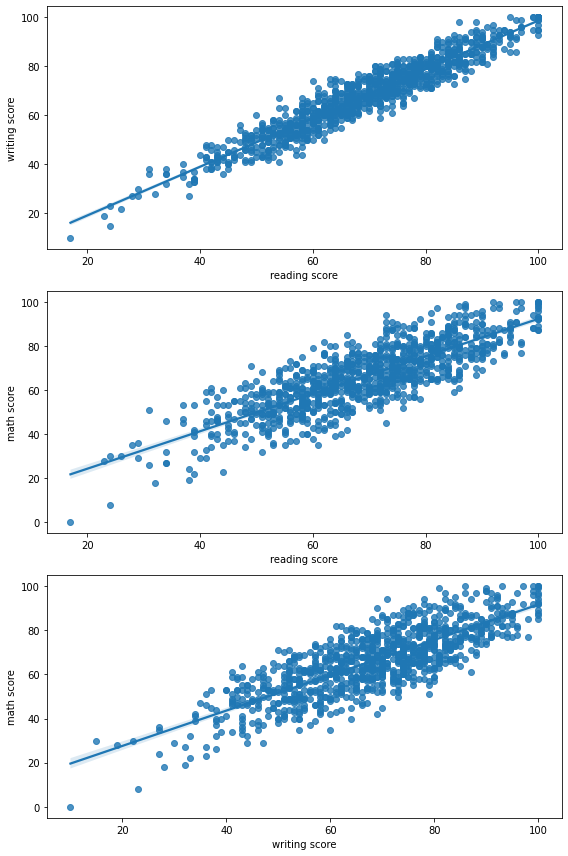

In [39]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.regplot(x=student['reading score'],y=student['writing score'],ax = ax[0])
sns.regplot(x=student['reading score'],y=student['math score'],ax = ax[1])
sns.regplot(x=student['writing score'],y=student['math score'],ax=ax[2])
plt.tight_layout()

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

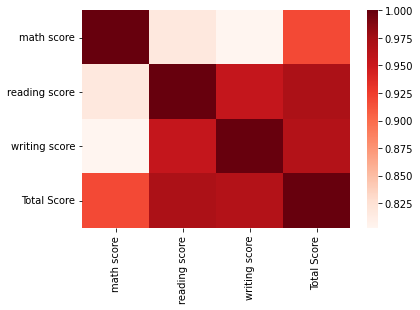

In [40]:
sns.heatmap(student.corr(), cmap ="Reds")
plt.xticks(rotation=90)

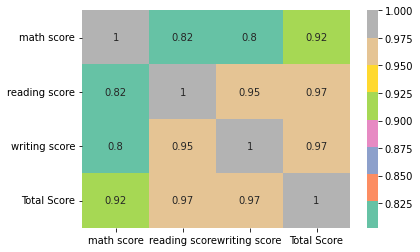

In [41]:
sns.heatmap(student.corr(),annot=True,cmap=sns.color_palette(palette='Set2'))
plt.show()

In [42]:
X=student[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [43]:
X_category = student[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [44]:
X_OH = pd.DataFrame(OH_encoder.fit_transform(X_category))
X_OH.index = X.index #One-hot encoding removes the index so it's necessary to put them back
X_OH

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [45]:
y=student['Pass/Fail']
y

0      P
1      P
2      P
3      P
4      P
      ..
995    P
996    P
997    P
998    P
999    P
Name: Pass/Fail, Length: 1000, dtype: object

In [46]:
lb=LabelEncoder()
y=lb.fit_transform(y)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_OH, y, train_size=0.8, test_size=0.2,random_state=0)

In [48]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
preds=model.predict(X_valid)

In [50]:
preds= np.where(preds<0.4,0,1)
preds


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [51]:
mae(y_valid,preds)

0.085

In [52]:
scores = -1 * cross_val_score(model, X_OH, y,cv=5,scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [0.11119198 0.10945739 0.10722716 0.11032314 0.10226356]


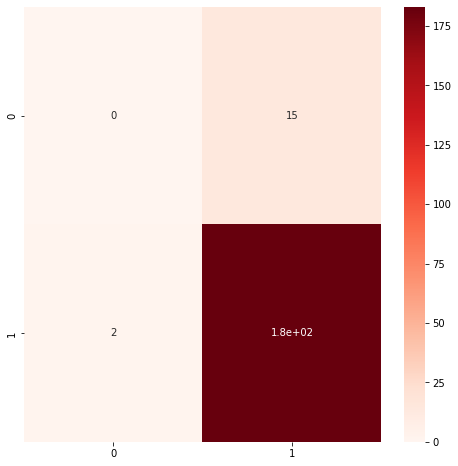

In [53]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_valid, preds)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()